In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [3]:
fake=pd.read_csv(os.path.join('datasets','fake news','Fake.csv'))
true=pd.read_csv(os.path.join('datasets','fake news','True.csv'))

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake['label']=1

In [7]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [8]:
true['label']=0

In [9]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [10]:
fake=fake[['text','label']]

In [11]:
true=true[['text','label']]

In [12]:
df=pd.concat([fake,true])

In [13]:
df.tail()

,text,label
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0
21416,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,0


In [14]:
df=df.sample(frac=1).reset_index(drop=True)

In [15]:
df.head()

,text,label
0,Jay Dyer 21st Century WireSuicide squad is who...,1
1,"In 1998, I lost my reputation and my dignity....",1
2,WASHINGTON (Reuters) - Indiana Governor Mike P...,0
3,,1
4,The Trump administration is preparing to redir...,1


In [16]:
df['text'].isnull().sum()

0

In [17]:
labels=df['label'].values

In [18]:
labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
mean_val=0
for word in df['text']:
    mean_val+=len(word)
mean_val/=len(df['text'])

In [47]:
int(mean_val)

2469

In [50]:
text=df['text'].map(lambda x: x[:int(mean_val)+1]).values

In [173]:
text

array(['Jay Dyer 21st Century WireSuicide squad is who they call to counsel the people leaving this vapid movie.  Possibly the worst superhero film yet, it even rivals the likes of Spawn, Catwoman and Ghost Rider.  At least there was Nic Cage, but here, only a confused and garbled CGI wasteland that is as messy as the single mom tats emblazoned every scene.  Nothing in this movie makes sense, much less is the plot even coherent, as a selection of  the worst  of America s convicts are chosen to become Task Force X, a microchipped hit team to take on the  meta-humans  (X-men, yawn) and the extra-dimensional entities that possess two paper-thin characters.Side note   the film is adapted from my old essay, United Skanks of America.This film is one of the few instances I can think of where the overt propaganda is actually more interesting to spot than the film itself.  Will Smiff plays a  hitman  baby-daddy whose only concern is scoring 2 million dollars to buy his daughter s attention.  Ye

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [195]:
MAX_FEATURES=200000
tokenizer=Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(text)

In [196]:
sequences=tokenizer.texts_to_sequences(text)

In [197]:
word2idx=tokenizer.word_index
vocab_size=len(word2idx)
vocab_size

118489

In [198]:
# sequences

In [199]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [200]:
padded_seq=pad_sequences(sequences,padding='post')

In [201]:
padded_seq.shape

(44898, 511)

In [202]:
input_len=len(padded_seq[1])
input_len

511

In [203]:
sequences_ragged=tf.ragged.constant(sequences)

In [204]:
dataset=tf.data.Dataset.from_tensor_slices((padded_seq,labels))
dataset=dataset.cache()
dataset=dataset.shuffle(1000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [205]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [206]:
X,y=train.as_numpy_iterator().next()

In [207]:
X.shape[1]

511

In [208]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Input,Embedding,Bidirectional

In [218]:
i=Input(shape=(input_len,))
e=Embedding(vocab_size+1,32)(i)
l1=Bidirectional(LSTM(64,activation='tanh',return_sequences=True))(e)
l4=Bidirectional(LSTM(64,activation='tanh'))(l1)
l2=Dense(128,activation='relu')(l4)
l3=Dense(64,activation='relu')(l2)
output=Dense(1,activation='sigmoid')(l3)
model=Model(i,output)

In [219]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [220]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 511)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 511, 32)           3791680   
                                                                 
 bidirectional_9 (Bidirectio  (None, 511, 128)         49664     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 64)                8256

In [221]:
history=model.fit(train,epochs=3,validation_data=val)

Epoch 1/3
1964/1964 [==============================] - 1333s 673ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0029 - val_accuracy: 0.9989
Epoch 2/3
1964/1964 [==============================] - 1221s 622ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9991
Epoch 3/3
1964/1964 [==============================] - 1388s 707ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0098 - val_accuracy: 0.9945


In [222]:
model.save('/saved_models/FakeNews.h5')

In [74]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

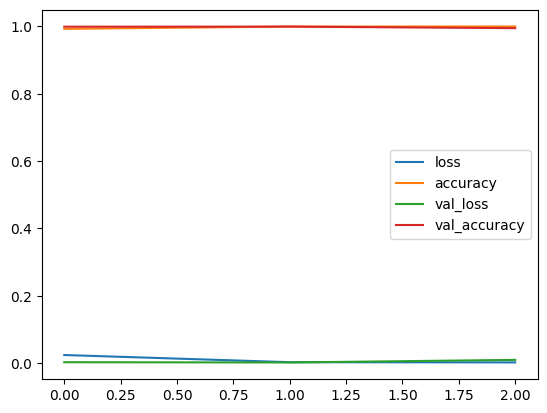

In [223]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [76]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy

In [224]:
pre=Precision()
re=Recall()
acc=Accuracy()

In [225]:
for batch in iter(test):
    X_true,y_true=batch
    yhat=model.predict(X_true)
    yhat=(yhat>=0.5).astype(int)
    yhat=yhat.flatten()
    y_true=y_true.numpy().flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 149ms/step


In [226]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9902377128601074, Accuracy 0.9948660731315613
